# Deep Q Learning

While regular Q-learning maps each state-action pair to its corresponding value, deep Q-learning uses a neural network to map input states to pairs via a three-step process:

* Initialising Target and Main neural networks
* Choosing an action
* Updating network weights using the Bellman Equation
https://www.qwak.com/post/a-brief-introduction-to-reinforcement-learning-deep-q-learning
* Deep Q-Learning is a variant of Q-Learning that uses a deep neural network to represent the Q-function, rather than a simple table of values. This allows the algorithm to handle environments with a large number of states and actions, as well as to learn from high-dimensional inputs such as images or sensor data.
* One of the key challenges in implementing Deep Q-Learning is that the Q-function is typically non-linear and can have many local minima. This can make it difficult for the neural network to converge to the correct Q-function. To address this, several techniques have been proposed, such as experience replay and target networks.
* Experience replay is a technique where the agent stores a subset of its experiences (state, action, reward, next state) in a memory buffer and samples from this buffer to update the Q-function. This helps to decorrelate the data and make the learning process more stable. Target networks, on the other hand, are used to stabilize the Q-function updates. In this technique, a separate network is used to compute the target Q-values, which are then used to update the Q-function network.
https://www.geeksforgeeks.org/deep-q-learning/
## Attacker versus Basic Defender

In [9]:
import sys
import logging
import gym
import importlib

import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.defender import ScanAndReimageCompromisedMachines
from cyberbattle._env.cyberbattle_env import AttackerGoal, DefenderConstraint

importlib.reload(learner)
importlib.reload(p)
importlib.reload(p)

# setting up environment

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")


cyberbattlechain_defender = gym.make('CyberBattleChain-v0',
                                     size=10,
                                     attacker_goal=AttackerGoal(
                                         own_atleast=0,
                                         own_atleast_percent=1.0
                                     ),
                                     defender_constraint=DefenderConstraint(
                                         maintain_sla=0.80
                                     ),
                                     defender_agent=ScanAndReimageCompromisedMachines(
                                         probability=0.6,
                                         scan_capacity=2,
                                         scan_frequency=5))


ep = w.EnvironmentBounds.of_identifiers(
    maximum_total_credentials=22,
    maximum_node_count=22,
    identifiers=cyberbattlechain_defender.identifiers
)

iteration_count = 600
training_episode_count = 10

* gamma=0.15: The discount factor, determining how much future rewards are valued.
* replay_memory_size=10000: Size of the replay memory, which stores experiences for later training the neural network.
* target_update=5: The frequency (in episodes) with which the target network is updated. The target network is used to stabilize training.
* batch_size=256: The number of experiences sampled from the replay memory for each training update.
* learning_rate=0.01: The rate at which the agent's neural network learns from the training data.
*  epsilon-greedy strategy controls the balance between exploring the environment (trying random actions) and exploiting the agent's current knowledge (choosing actions based on the neural network's predictions).
*  environment_properties=ep: Properties of the environment, like the maximum number of nodes and credentials.
* episode_count=training_episode_count: The number of episodes for which the agent will be trained.
* iteration_count=iteration_count: The number of iterations (time steps) in each episode.
* epsilon=0.90: The initial exploration rate. A higher value encourages more exploration over exploitation.
* epsilon_exponential_decay=5000: The rate at which epsilon decays, encouraging less exploration and more exploitation over time.
* epsilon_minimum=0.10: The minimum value to which epsilon can decay, ensuring some level of exploration throughout.
* verbosity=Verbosity.Quiet: Controls the level of logging/output during training.

In [2]:
dqn_with_defender = learner.epsilon_greedy_search(
    cyberbattle_gym_env=cyberbattlechain_defender,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.15,
        replay_memory_size=10000,
        target_update=5,
        batch_size=256,
        learning_rate=0.01),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="DQL"
)

###### DQL
Learning with: episode_count=10,iteration_count=600,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/10 'DQL' ϵ=0.9000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||/home/gmod1/CyberBattleSim/cyberbattle/agents/baseline/agent_dql.py:382: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 600|reward:  787.0|last_reward_at:  595|Elapsed Time: 0:00:06||


  Episode 1 stopped at t=600 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/72 (0.11)
    explore-remote: 13/213 (0.06)
    explore-connect: 3/202 (0.01)
    exploit-local: 3/15 (0.17)
    exploit-remote: 0/4 (0.00)
    exploit-connect: 3/63 (0.05)
  exploit deflected to exploration: 10
  ## Episode: 2/10 'DQL' ϵ=0.8097, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 2|Iteration 296|reward: 5525.0|last_reward_at:  296|Elapsed Time: 0:00:01||


  Episode 2 ended at t=296 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/42 (0.09)
    explore-remote: 9/78 (0.10)
    explore-connect: 1/108 (0.01)
    exploit-local: 4/15 (0.21)
    exploit-remote: 0/6 (0.00)
    exploit-connect: 4/25 (0.14)
  exploit deflected to exploration: 8
  ## Episode: 3/10 'DQL' ϵ=0.7689, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 3|Iteration 426|reward: 5790.0|last_reward_at:  426|Elapsed Time: 0:00:02||


  Episode 3 ended at t=426 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/76 (0.11)
    explore-remote: 12/92 (0.12)
    explore-connect: 0/124 (0.00)
    exploit-local: 4/17 (0.19)
    exploit-remote: 2/36 (0.05)
    exploit-connect: 7/47 (0.13)
  exploit deflected to exploration: 5
  ## Episode: 4/10 'DQL' ϵ=0.7143, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 4|Iteration 526|reward: 5915.0|last_reward_at:  526|Elapsed Time: 0:00:02||


  Episode 4 ended at t=526 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/67 (0.07)
    explore-remote: 8/130 (0.06)
    explore-connect: 0/134 (0.00)
    exploit-local: 9/19 (0.32)
    exploit-remote: 8/83 (0.09)
    exploit-connect: 7/56 (0.11)
  exploit deflected to exploration: 3
  ## Episode: 5/10 'DQL' ϵ=0.6529, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 5|Iteration 211|reward: 6018.0|last_reward_at:  211|Elapsed Time: 0:00:01||


  Episode 5 ended at t=211 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/28 (0.12)
    explore-remote: 11/41 (0.21)
    explore-connect: 1/50 (0.02)
    exploit-local: 10/22 (0.31)
    exploit-remote: 5/14 (0.26)
    exploit-connect: 8/17 (0.32)
  exploit deflected to exploration: 1
  ## Episode: 6/10 'DQL' ϵ=0.6301, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 6|Iteration 251|reward: 5884.0|last_reward_at:  251|Elapsed Time: 0:00:01||


  Episode 6 ended at t=251 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/34 (0.06)
    explore-remote: 4/57 (0.07)
    explore-connect: 1/66 (0.01)
    exploit-local: 12/0 (1.00)
    exploit-remote: 3/37 (0.07)
    exploit-connect: 7/28 (0.20)
  exploit deflected to exploration: 2
  ## Episode: 7/10 'DQL' ϵ=0.6041, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 7|Iteration 226|reward: 5908.0|last_reward_at:  226|Elapsed Time: 0:00:01||


  Episode 7 ended at t=226 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/26 (0.13)
    explore-remote: 13/47 (0.22)
    explore-connect: 1/44 (0.02)
    exploit-local: 11/3 (0.79)
    exploit-remote: 1/17 (0.06)
    exploit-connect: 6/53 (0.10)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'DQL' ϵ=0.5818, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 8|Iteration 76|reward: 6094.0|last_reward_at:   76|Elapsed Time: 0:00:00||


  Episode 8 ended at t=76 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 8/10 (0.44)
    explore-connect: 1/14 (0.07)
    exploit-local: 13/3 (0.81)
    exploit-remote: 1/5 (0.17)
    exploit-connect: 8/3 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'DQL' ϵ=0.5746, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 9|Iteration 61|reward: 5622.0|last_reward_at:   61|Elapsed Time: 0:00:00||


  Episode 9 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 5/3 (0.62)
    explore-connect: 0/17 (0.00)
    exploit-local: 8/3 (0.73)
    exploit-remote: 0/10 (0.00)
    exploit-connect: 5/3 (0.62)
  exploit deflected to exploration: 2
  ## Episode: 10/10 'DQL' ϵ=0.5688, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 10|Iteration 166|reward: 5996.0|last_reward_at:  166|Elapsed Time: 0:00:00||


  Episode 10 ended at t=166 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/20 (0.05)
    explore-remote: 4/37 (0.10)
    explore-connect: 0/34 (0.00)
    exploit-local: 12/6 (0.67)
    exploit-remote: 7/31 (0.18)
    exploit-connect: 8/6 (0.57)
  exploit deflected to exploration: 0
simulation ended


/home/gmod1/CyberBattleSim/cyberbattle/agents/baseline/plotting.py:177: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


 exploiting the learned strategy of the Deep Q-Learning (DQL) agent
 * epsilon=0.0: Sets the exploration rate to zero, meaning the agent will only exploit its learned strategy and will not explore at all. This is different from the training phase, where epsilon was higher to allow for exploration.

In [3]:
dql_exploit_run = learner.epsilon_greedy_search(
    cyberbattlechain_defender,
    ep,
    learner=dqn_with_defender['learner'],
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,  # 0.35,
    render=False,
    # render_last_episode_rewards_to='images/chain10',
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL"
)

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=600,ϵ=0.0,ϵ_min=0.0, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 1|Iteration 451|reward: 6164.0|last_reward_at:  451|Elapsed Time: 0:00:02||


  Episode 1 ended at t=451 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 19/6 (0.76)
    exploit-remote: 17/334 (0.05)
    exploit-connect: 10/63 (0.14)
  exploit deflected to exploration: 2
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 2|Iteration 26|reward: 5860.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 2 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 15/0 (1.00)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 7/2 (0.78)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 3|Iteration 61|reward: 5992.0|last_reward_at:   61|Elapsed Time: 0:00:00||


  Episode 3 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 18/0 (1.00)
    exploit-remote: 5/25 (0.17)
    exploit-connect: 8/5 (0.62)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 4|Iteration 26|reward: 5968.0|last_reward_at:   26|Elapsed Time: 0:00:00||


  Episode 4 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 17/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 8/1 (0.89)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 5|Iteration 61|reward: 7240.0|last_reward_at:   61|Elapsed Time: 0:00:00||


  Episode 5 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 20/0 (1.00)
    exploit-remote: 9/17 (0.35)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 6|Iteration 76|reward: 6158.0|last_reward_at:   76|Elapsed Time: 0:00:00||


  Episode 6 ended at t=76 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 19/6 (0.76)
    exploit-remote: 16/17 (0.48)
    exploit-connect: 9/9 (0.50)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 7|Iteration 336|reward: 6138.0|last_reward_at:  336|Elapsed Time: 0:00:02||


  Episode 7 ended at t=336 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 19/6 (0.76)
    exploit-remote: 12/280 (0.04)
    exploit-connect: 9/10 (0.47)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 8|Iteration 21|reward: 5616.0|last_reward_at:   21|Elapsed Time: 0:00:00||


  Episode 8 ended at t=21 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 6/3 (0.67)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 9|Iteration 106|reward: 6154.0|last_reward_at:  106|Elapsed Time: 0:00:00||


  Episode 9 ended at t=106 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 19/7 (0.73)
    exploit-remote: 15/44 (0.25)
    exploit-connect: 9/12 (0.43)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 10|Iteration 291|reward: 6042.0|last_reward_at:  291|Elapsed Time: 0:00:01||


  Episode 10 ended at t=291 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 17/2 (0.89)
    exploit-remote: 17/234 (0.07)
    exploit-connect: 9/12 (0.43)
  exploit deflected to exploration: 0
simulation ended


* executes a training and exploration process for a specific type of agent
* Credential Cache Exploiter Agent: This agent's strategy is centered around exploiting known credentials
* Exploration and Exploitation Balance: The agent uses an epsilon-greedy strategy to balance between exploring new actions and exploiting the best-known actions based on past experiences.
* Adaptive Learning: Over time, as epsilon decays, the agent gradually shifts from exploring new actions to exploiting the best-known strategies, allowing for a dynamic learning process.

In [4]:
credlookup_run = learner.epsilon_greedy_search(
    cyberbattlechain_defender,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)"
)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=600,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 111|reward: 5614.0|last_reward_at:  111|Elapsed Time: 0:00:00||


  Episode 1 ended at t=111 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/30 (0.19)
    explore-remote: 9/58 (0.13)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/2 (0.71)
  exploit deflected to exploration: 3
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8912, 


Episode 2|Iteration 131|reward: 5378.0|last_reward_at:  131|Elapsed Time: 0:00:00||


  Episode 2 ended at t=131 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/41 (0.11)
    explore-remote: 7/69 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/6 (0.33)
  exploit deflected to exploration: 2
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8810, 


Episode 3|Iteration 261|reward: 5403.0|last_reward_at:  261|Elapsed Time: 0:00:00||


  Episode 3 ended at t=261 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/75 (0.07)
    explore-remote: 9/149 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/19 (0.14)
  exploit deflected to exploration: 18
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.8608, 


Episode 4|Iteration 176|reward: 5405.0|last_reward_at:  176|Elapsed Time: 0:00:00||


  Episode 4 ended at t=176 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/37 (0.14)
    explore-remote: 9/105 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/16 (0.16)
  exploit deflected to exploration: 10
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.8476, 


Episode 5|Iteration 376|reward: 5884.0|last_reward_at:  376|Elapsed Time: 0:00:00||


  Episode 5 ended at t=376 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/114 (0.10)
    explore-remote: 13/187 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 7/42 (0.14)
  exploit deflected to exploration: 4
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.8200, 


Episode 6|Iteration 111|reward: 5742.0|last_reward_at:  111|Elapsed Time: 0:00:00||


  Episode 6 ended at t=111 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/30 (0.23)
    explore-remote: 11/49 (0.18)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/6 (0.50)
  exploit deflected to exploration: 10
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.8120, 


Episode 7|Iteration 216|reward: 5768.0|last_reward_at:  216|Elapsed Time: 0:00:00||


  Episode 7 ended at t=216 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/69 (0.14)
    explore-remote: 13/94 (0.12)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/23 (0.21)
  exploit deflected to exploration: 11
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.7968, 


Episode 8|Iteration 236|reward: 5775.0|last_reward_at:  236|Elapsed Time: 0:00:00||


  Episode 8 ended at t=236 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/64 (0.17)
    explore-remote: 11/114 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/28 (0.18)
  exploit deflected to exploration: 10
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.7806, 


Episode 9|Iteration 401|reward: 5903.0|last_reward_at:  401|Elapsed Time: 0:00:00||


  Episode 9 ended at t=401 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/106 (0.11)
    explore-remote: 16/177 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 7/82 (0.08)
  exploit deflected to exploration: 18
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.7538, 


Episode 10|Iteration 521|reward: 5783.0|last_reward_at:  521|Elapsed Time: 0:00:00||


  Episode 10 ended at t=521 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/152 (0.07)
    explore-remote: 14/243 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 7/93 (0.07)
  exploit deflected to exploration: 40
simulation ended


In [10]:
%matplotlib inline 

Cumulative Rewards: The plot focuses on the averaged cumulative rewards, which can provide insights into how effectively each agent learns and performs over time in the simulation. Higher cumulative rewards suggest better performance in achieving the goals set in the environment.

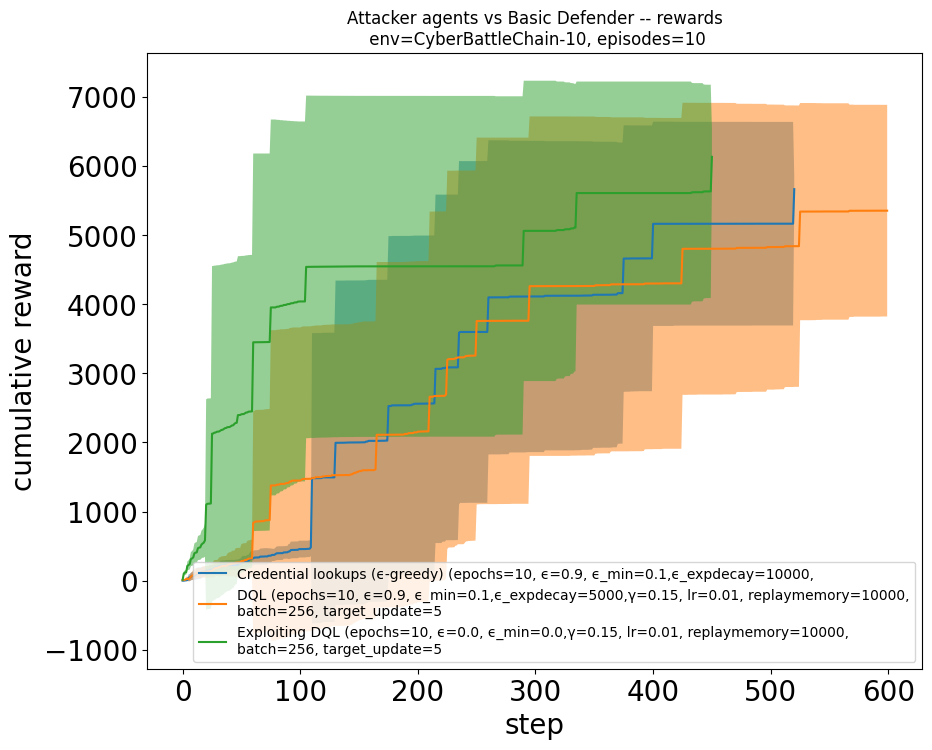

In [6]:
import matplotlib
# Plots
all_runs = [
    credlookup_run,
    dqn_with_defender,
    dql_exploit_run
]
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Attacker agents vs Basic Defender -- rewards\n env={cyberbattlechain_defender.name}, episodes={training_episode_count}',
    show=False
)

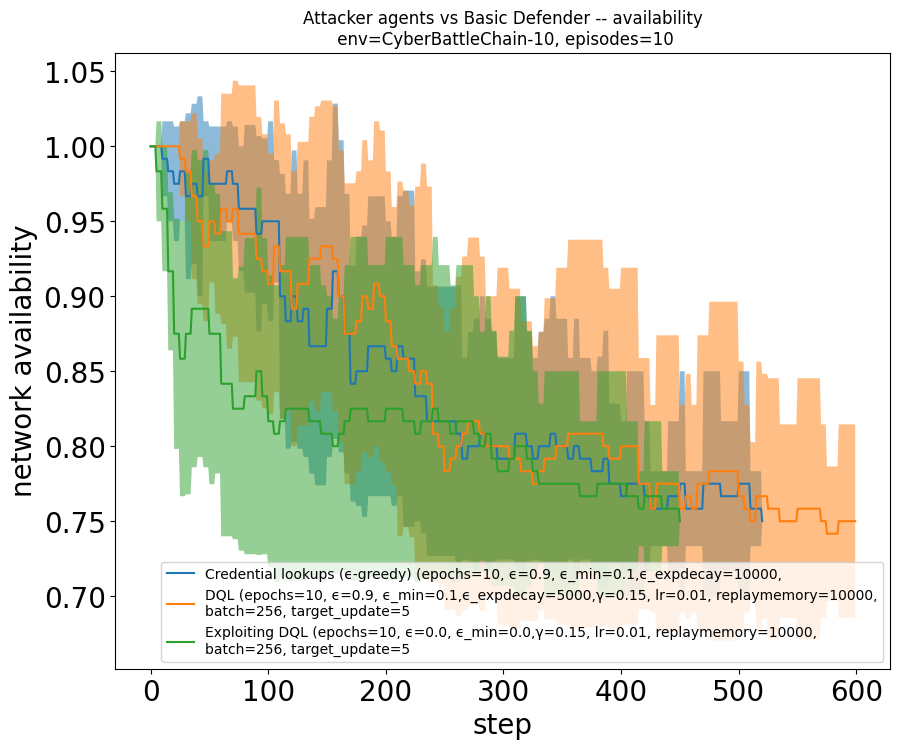

In [7]:
# p.plot_episodes_length(all_runs)
p.plot_averaged_availability(title=f"Attacker agents vs Basic Defender -- availability\n env={cyberbattlechain_defender.name}, episodes={training_episode_count}", all_runs=all_runs, show=False)

In [8]:
matplotlib.pyplot.show()